In [10]:
import sys
import pandas as pd
from matplotlib import pyplot as plt

In [35]:
results_files = {
    "cFlow": "../../experiments/finn/cmnist_xy_y_on_recons_more_eval.csv",
    "cVAE": "../../experiments/vae/cmnist_xy_y_on_recons_more_evals.csv",
    "CNN": "../../experiments/baseline/cmnist_naive_baseline_color_40epochs.csv",
    "Kim et al.": "../../experiments/ln2l/cmnist_old.csv",
}

In [36]:
results = {k: pd.read_csv(v).sort_values(by="Scale", ignore_index=True) for k, v in results_files.items()}

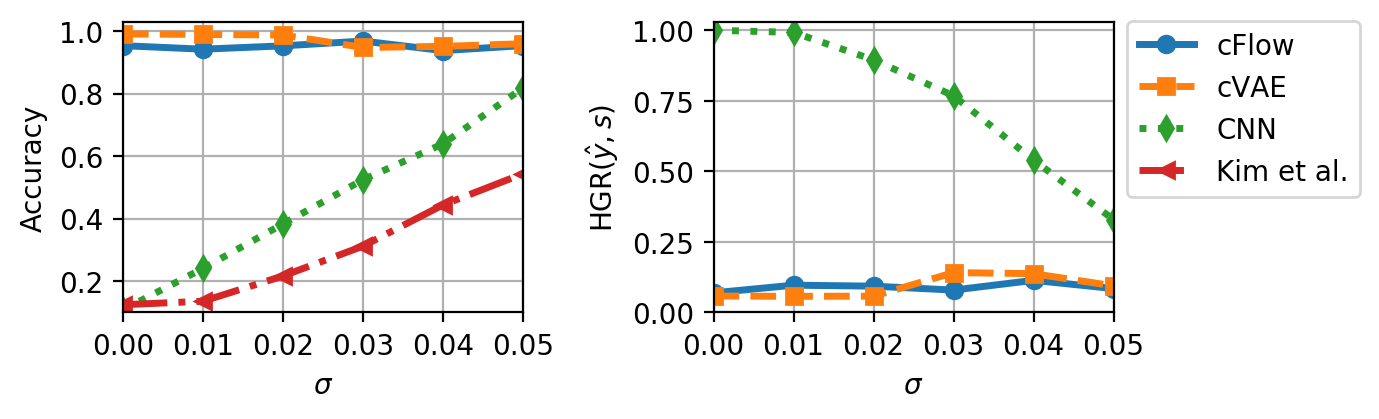

In [37]:
x_key, x_name = ("Scale", r"$\sigma$")

assert len(results) <= 5, "we only have 5 line styles right now"
linestyles = ["-", "--", ":", "-.", (0, (5, 5))]
markerstyles = ["o", "s", "d", "<", ">", "x", "+"]
marker = 0
fig, plots = plt.subplots(ncols=2, figsize=(7.0, 2.2), dpi=200, facecolor="white")
for plot, (y_key, y_name) in zip(plots, [("Accuracy", "Accuracy"), ("Renyi preds and s", r"HGR($\hat{y}, s$)")]):
    for linestyle, (key, result) in zip(linestyles, results.items()):
        try:
            plot.plot(
                result[x_key],
                result[y_key],
                marker=markerstyles[marker],
                label=key,
                linestyle=linestyle,
                linewidth=2.5,
            )
            marker += 1
        except:
            pass
    marker = 0
    plot.grid(True)
    plot.set_xlabel(x_name)
    plot.set_ylabel(y_name)
    plot.set_xticks([0, 0.01, 0.02, 0.03, 0.04, 0.05])
    if y_key == "Accuracy":
        plot.set_xlim((0, 0.05))
        plot.set_ylim((0.1, 1.03))
    if y_key == "Renyi preds and s":
        plot.set_xlim((0, 0.05))
        plot.set_ylim((0, 1.03))
plots[-1].legend(loc="upper left", bbox_to_anchor=(1, 1.05))
fig.tight_layout()
fig.savefig("cmnist_new.pdf", bbox_inches='tight', pad_inches=0)